In [1]:
import matplotlib
print(matplotlib.__version__)

2.2.4


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

X = pd.read_csv('./conc_3000.csv', index_col=[0])
NAMES = X.dtypes.index

X = X.sample(frac=1).reset_index(drop=True)
Y = X.pop('LABEL').values

model = RandomForestClassifier()
model.fit(X, Y)

f_imp = sorted(list(zip(NAMES, model.feature_importances_)), key=lambda x: x[1], reverse=True)

/home/jwetesko/.local/lib/python3.4/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [4]:
i = 1
for el in f_imp:
    if el[1] > 0:
        print("{1} - {0}".format(el,i))
        i += 1

1 - ('android.permission.BROADCAST_WAP_PUSH', 0.09285677406093165)
2 - ('android.intent.action.ACTION_PACKAGE_NEEDS_VERIFICATION', 0.0656737733771697)
3 - ('android.permission.INTERNET', 0.059857540939900845)
4 - ('android.permission.ACCESS_CHECKIN_PROPERTIES', 0.0532760136531736)
5 - ('android.permission.ACCESS_NOTIFICATIONS', 0.047218287522335756)
6 - ('android.intent.action.ACTION_APPLICATION_RESTRICTIONS_CHANGED', 0.03993676561604737)
7 - ('android.permission.BLUETOOTH_MAP', 0.03957718059324895)
8 - ('android.permission.PERSISTENT_ACTIVITY', 0.037415914515510545)
9 - ('android.permission.RECOVERY', 0.03739198294156691)
10 - ('android.permission.MANAGE_DOCUMENTS', 0.03217462982332679)
11 - ('android.permission.BRICK', 0.025826810319441083)
12 - ('USES_BROADCAST', 0.022619470646806836)
13 - ('android.intent.action.ACTION_PACKAGE_DATA_CLEARED', 0.02089897589190558)
14 - ('android.permission.CAPTURE_VIDEO_OUTPUT', 0.02088813873777493)
15 - ('android.intent.action.ACTION_CONFIGURATION_C

In [5]:
print([x[0] for x in f_imp[:184]])

['android.permission.BROADCAST_WAP_PUSH', 'android.intent.action.ACTION_PACKAGE_NEEDS_VERIFICATION', 'android.permission.INTERNET', 'android.permission.ACCESS_CHECKIN_PROPERTIES', 'android.permission.ACCESS_NOTIFICATIONS', 'android.intent.action.ACTION_APPLICATION_RESTRICTIONS_CHANGED', 'android.permission.BLUETOOTH_MAP', 'android.permission.PERSISTENT_ACTIVITY', 'android.permission.RECOVERY', 'android.permission.MANAGE_DOCUMENTS', 'android.permission.BRICK', 'USES_BROADCAST', 'android.intent.action.ACTION_PACKAGE_DATA_CLEARED', 'android.permission.CAPTURE_VIDEO_OUTPUT', 'android.intent.action.ACTION_CONFIGURATION_CHANGED', 'android.hardware.screen.portrait', 'android.intent.action.ACTION_SHUTDOWN', 'android.intent.action.ACTION_INSTALL_PACKAGE', 'android.hardware.sensor.relative_humidity', 'android.intent.action.ACTION_REBOOT', 'android.intent.action.ACTION_MEDIA_UNMOUNTED', 'android.permission.TRUST_LISTENER', 'android.permission.RECEIVE_DATA_ACTIVITY_CHANGE', 'android.permission.REA

In [14]:
for el in f_imp[-10:]:
    print(el)

('android.permission.BATTERY_STATS', 0.0)
('android.permission.GLOBAL_SEARCH', 0.0)
('android.intent.action.ACTION_LOCKED_BOOT_COMPLETED', 0.0)
('android.permission.SET_INPUT_CALIBRATION', 0.0)
('android.software.home_screen', 0.0)
('android.permission.RECEIVE_WIFI_CREDENTIAL_CHANGE', 0.0)
('android.intent.action.ACTION_EDIT', 0.0)
('android.hardware.camera.autofocus', 0.0)
('android.intent.action.ACTION_PACKAGE_VERIFIED', 0.0)
('android.intent.action.ACTION_MEDIA_CHECKING', 0.0)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.DataFrame(f_imp, columns=["ATRYBUT", "WAGA"])
df.head()

,ATRYBUT,WAGA
0,android.permission.BROADCAST_WAP_PUSH,0.101939
1,android.permission.INTERNET,0.063675
2,android.permission.ACCESS_NOTIFICATIONS,0.052405
3,android.permission.PERSISTENT_ACTIVITY,0.048692
4,android.intent.action.ACTION_PACKAGE_NEEDS_VER...,0.044740


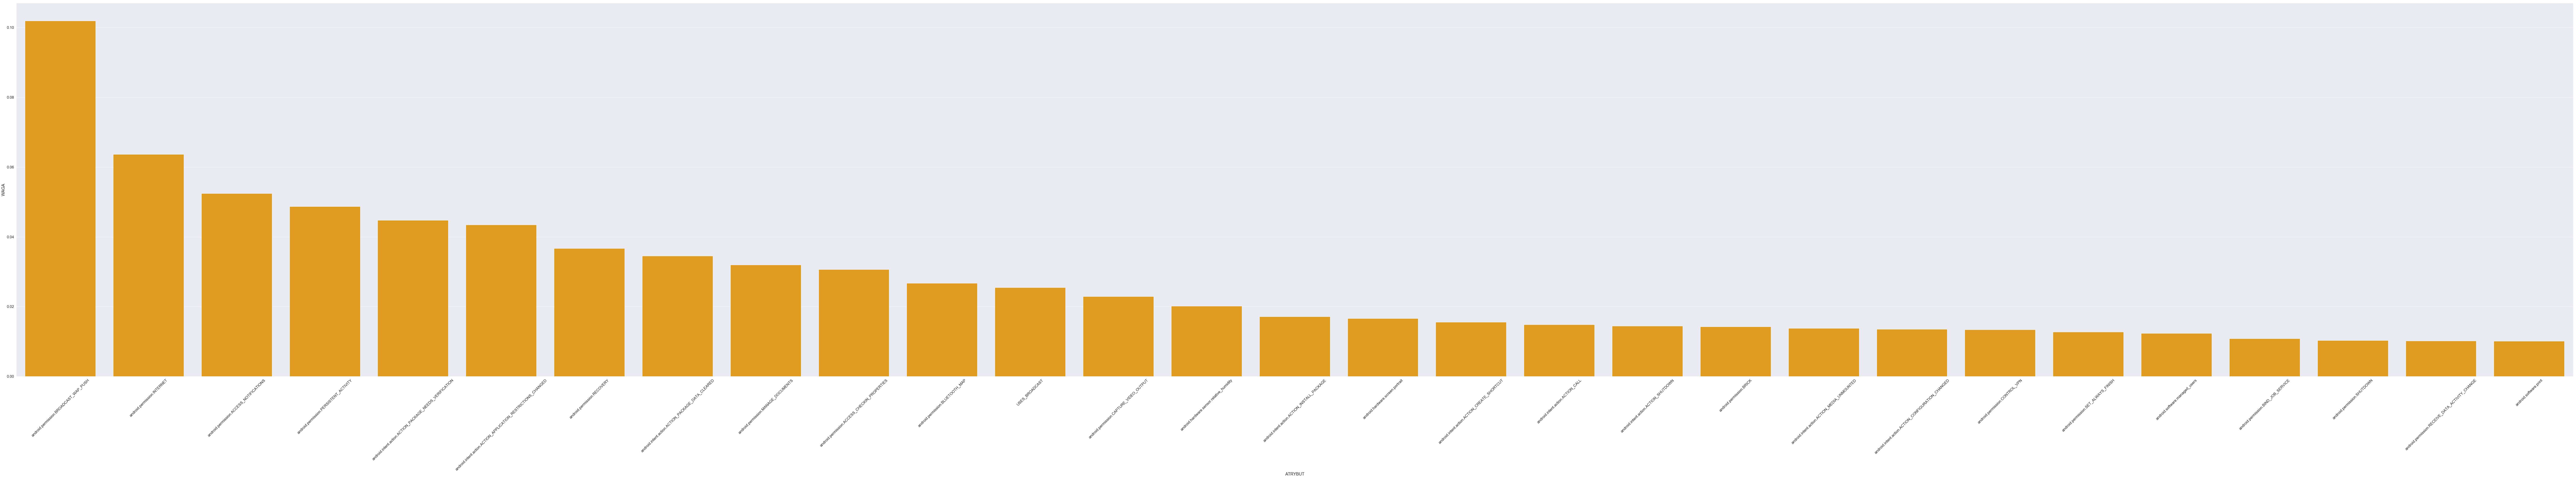

In [36]:
import matplotlib
from matplotlib import pyplot
%matplotlib inline

palette = sns.light_palette("orange", reverse=True)
sns.set_palette(palette)

a4_dims = (200, 30)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.set(font_scale=1.5)
pyplot.xticks(rotation=45)
plot = sns.barplot(x="ATRYBUT", y="WAGA", data=df[df["WAGA"] > 0.01], ax=ax, color='orange')
plt.show()